## profile 

In [1]:
# line by line profiler
def list_sum(N):
    total = 0
    for i in range(5):
        le = [j^(j<<N) for j in range(N) ]
        total += sum(le)
    return total
%prun list_sum(10000)
%load_ext line_profiler
%lprun -f list_sum list_sum(10000)

In [2]:
# memory profiler
%load_ext memory_profiler
%memit list_sum(10000)
# We can see the above function use usually 90M mem

peak memory: 92.70 MiB, increment: 27.31 MiB


## Chapter 2 Numpy

In [3]:
import numpy as np
np.__version__

'1.13.1'

### ndarray静态数组对比动态数组的区别与优势

书中关于静态语言与动态语言变量名的实质阐述：

Notice the difference here: a C integer is essentially a label for a position in memory
whose bytes encode an integer value. A Python integer is a pointer to a position in
memory containing all the Python object information, including the bytes that con‐
tain the integer value. This extra information in the Python integer structure is what
allows Python to be coded so freely and dynamically. All this additional information
in Python types comes at a cost, however, which becomes especially apparent in
structures that combine many of these objects.

就是说Python的变量名其实是变量的Info，相当于指针在存储；

那么python最常用的容器list，可以随意加入各种类型，那每个item也就自然而然地带有Info:

![](https://ws1.sinaimg.cn/large/6af92b9fly1fw8ra16jo1j20lu0fmmzp.jpg)

In [4]:
# python其实是自带有跟C静态数组一样的数据结构的：
import array
le = [1,2,3,4]
arr = array.array('i',le)
arr, type(arr[1])

(array('i', [1, 2, 3, 4]), int)

### np 创建数组，再回顾一些不熟悉的方法

In [5]:
# mean 0, std(standard deviation 1) size(3,3)
np.random.normal(0,1,(3,3))

array([[ 0.93255707,  0.27917789, -0.36167729],
       [ 0.04965338,  0.907146  ,  0.89196801],
       [-0.54300935, -0.02723854, -0.00347492]])

In [6]:
# value range:[0,1] default:
np.random.random((3,3))

array([[ 0.50112826,  0.78823531,  0.54207821],
       [ 0.05013472,  0.63815932,  0.48830414],
       [ 0.24319284,  0.56134133,  0.18571862]])

In [7]:
# int type
np.random.randint(0,10,(3,3))

array([[0, 2, 1],
       [1, 9, 9],
       [5, 6, 9]])

In [8]:
# create same-value matrix:
np.full((3,4),3.14)

array([[ 3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14]])

### ndarray 的attributes

In [9]:
# 熟悉的有size,shape,dtype,ndim,等
np.random.seed(0)
A = np.random.randint(0,10,(3,3,3))
print("item size:",A.itemsize,"bytes")
print("nbytes:",A.nbytes,"bytes")

item size: 4 bytes
nbytes: 108 bytes


### slice and copy
A[start:end:step]

In [10]:
A_sub = A[:2,:2] #取出某块 修改无效
A_sub_copy =A[:2,:2].copy() #复制某块，修改有效

### concatenation & split

In [11]:
# 要注意 concatenate方法和 vstack/hstack的区别
# 合并同一纬度：
x1 = np.array([1,2,3])
x2 = np.array([3,4,5])
np.concatenate([x1,x2])

array([1, 2, 3, 3, 4, 5])

In [12]:
x1 = np.array([[1,2,3]])
x2 = np.array([[4,5,6]])
np.concatenate([x1,x2],axis = 0)

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
# 合并不同维度使用stack:
x1 = np.array([1,2,3])
x2 = np.array([[3,4,5],[6,7,8]])
np.vstack((x1,x2))

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 8]])

### ufunc

In [14]:
# 记录几个不熟悉但有用的ufunc：
# 累积和
x = np.arange(1,10)
x_cum = np.cumsum(x)
x_prod = np.prod(x)
x_prod_cum = np.cumprod(x)
x_cum, x_prod,x_prod_cum

(array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32),
 362880,
 array([     1,      2,      6,     24,    120,    720,   5040,  40320,
        362880], dtype=int32))

### Fancy Indexing
返回Index shape的数组

In [15]:
X = np.arange(10)
ind = np.array([[2,4],[0,1]]) 
X[ind] # 按照Ind 的shape返回矩阵，而不是参照X!

array([[2, 4],
       [0, 1]])

### Example 随机选择

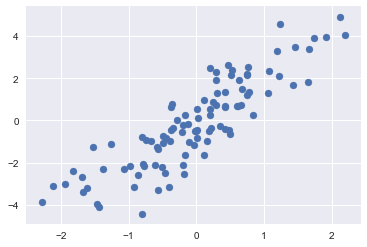

In [16]:
mean = [0,0]
cov = [[1,2],[2,5]]
X = np.random.multivariate_normal(mean, cov, 100)
import matplotlib.pyplot as  plt
import seaborn as sns
sns.set()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [17]:
ind = np.random.choice(X.shape[0],20,replace = False)
ind

array([14, 93, 50, 45, 95, 47, 15, 90, 73, 21, 34, 97, 88, 37, 68, 32, 96,
        5, 26, 78])

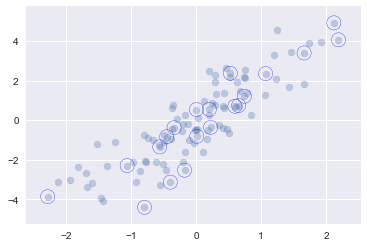

In [18]:
selections = X[ind]
plt.scatter(X[:,0],X[:,1],alpha = 0.3)
plt.scatter(selections[:,0],selections[:,1],facecolor = 'none',s= 200,edgecolors= 'b')
plt.show()

### Example2： Binning Data

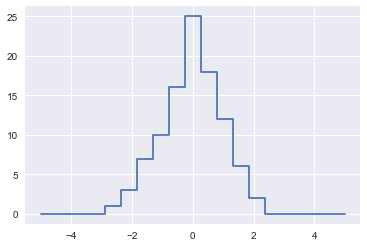

In [46]:
np.random.seed(40)
x = np.random.randn(100)
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)
i = np.searchsorted(bins,x)
np.add.at(counts,i,1) # 在i的位置上+1
plt.plot(bins,counts,linestyle = 'steps')
plt.show()

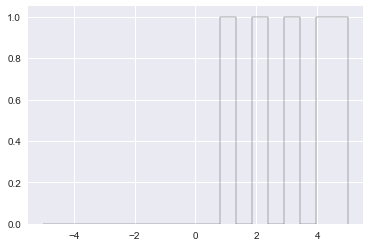

In [45]:
# 当然会有更简单的API绘制bin图
plt.hist(x,bins,histtype = 'step',color = 'black')
plt.show()

### Patial Sorting

In [22]:
# 部分排序,可用于解决top-k问题
x = np.array([7, 2, 3, 1, 6, 5, 4])
# 将数组分成两部分，前三个是最小的，两部分内部都随机排序
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [26]:
x_2d = np.random.randint(0,20,25).reshape((5,5))
x_2d

array([[17,  5,  0,  5, 17],
       [17, 13,  0,  0, 17],
       [ 5, 14, 19,  2, 17],
       [ 4,  6, 17,  0,  0],
       [15, 13,  0,  6,  8]])

In [28]:
np.partition(x_2d,2,axis = 1) #按行进行分块，前两个是最小的

array([[ 0,  5,  5, 17, 17],
       [ 0,  0, 13, 17, 17],
       [ 2,  5, 14, 19, 17],
       [ 0,  0,  4, 17,  6],
       [ 0,  6,  8, 13, 15]])

### Example: KNN

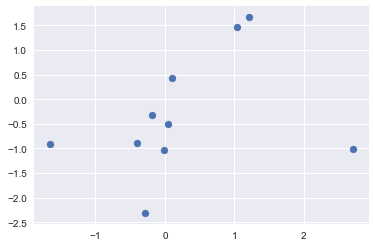

In [35]:
# 下面我用Numpy的排序功能实现KNN：
X = np.random.randn(20).reshape((10,2))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [36]:
difference = X[:,np.newaxis,:] - X[np.newaxis,:,:] # 核心语句，扩增维度，方便计算！
difference.shape

(10, 10, 2)

In [38]:
difference = difference **2
dist_sq = np.sum(difference,axis = -1)
dist_sq.shape

(10, 10)

In [41]:
nearest = np.argpartition(dist_sq,3,axis = 1)
nearest

array([[0, 8, 5, 6, 7, 1, 9, 3, 2, 4],
       [1, 6, 0, 8, 7, 5, 9, 3, 2, 4],
       [2, 6, 0, 5, 9, 1, 3, 7, 8, 4],
       [3, 7, 8, 9, 4, 5, 6, 1, 2, 0],
       [4, 9, 7, 3, 8, 5, 0, 6, 1, 2],
       [8, 5, 7, 9, 0, 1, 6, 3, 2, 4],
       [1, 6, 0, 8, 7, 5, 9, 3, 2, 4],
       [9, 7, 5, 8, 3, 0, 6, 1, 2, 4],
       [8, 5, 7, 9, 0, 1, 6, 3, 2, 4],
       [9, 7, 5, 8, 4, 1, 6, 3, 2, 0]], dtype=int64)

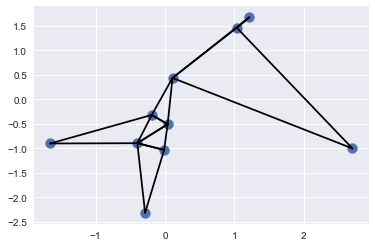

In [44]:
K = 2
plt.scatter(X[:,0],X[:,1],s = 100)
for i in range(X.shape[0]):
    for j in nearest[i,:K+1]:
        plt.plot(*zip(X[j],X[i]),c = 'black')
plt.show() # 绘制出了每个点距离最近的两个点

## Pandas

In [48]:
import pandas as pd
pd.__version__

'0.20.3'

### Data Selections in Pandas

In [50]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [51]:
# slicing from expilicit integer：
data[0:2]

a    0.25
b    0.50
dtype: float64

In [52]:
# slicing from explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [54]:
# masking
data[(data <1) & (data >0.5)]

c    0.75
dtype: float64

In [55]:
# fancy indexing
data[['a','e']]

a    0.25
e     NaN
dtype: float64

### Indexers :loc,iloc,inx

In [57]:
# 这三种方法出现的原因是上述的集中方法会在某些情况下产生歧义如：
data = pd.Series(data=['a','b','c'] ,index = [1,3,5])
data

1    a
3    b
5    c
dtype: object

In [60]:
# loc indexing and slicing the data that always references the explicit index
data.loc[1] 

'a'

In [61]:
data.loc[1:3]

1    a
3    b
dtype: object

In [62]:
# iloc indexing and slicing data that always references the Python-Style index:
data.iloc[1]

'b'

In [63]:
data.iloc[0:2]

1    a
3    b
dtype: object

**DataFrame的select 操作与Series方法相同，需要注意的有几个奇怪的convention:**
- df[indexing] 默认对column操作...
- df[slicing] 默认对index操作...

In [64]:
 area = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 'Florida': 170312,'Illinois': 149995})
 pop = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127, 'Florida': 19552860,'Illinois': 12882135})
 data = pd.DataFrame({'area':area, 'pop':pop})
 data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [65]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [67]:
data['California':'New York']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127


In [68]:
data['density'] = data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [69]:
data[data.density >100][['area','pop']]
# 为减少masking时括号中套括号，去列可用df.col操作

,area,pop
Florida,170312,19552860
New York,141297,19651127


**突然忘记记录pandas最重要的一个；其实pandas除了df,ser之外还有一个数据结构：Index，具体表现在df.index和ser.index中，他有两个重要的性质：**
- 有序性，自动按照顺序存储，跟array一样可以选择
- 集合性，可以使用一些集合的操作

In [70]:
data.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [72]:
ser = pd.Series([1,2,3],index = ['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

In [74]:
'a' in ser.index

True

In [75]:
ser.index | data.index # 做交集运算

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas', 'a', 'b',
       'c'],
      dtype='object')

### Operating  on Data in Pandas

In [77]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0,10,(2,2)),columns = list('AB'))
B = pd.DataFrame(rng.randint(0,20,(3,3)),columns = list('BAC'))
A

,A,B
0,6,3
1,7,4


In [78]:
B

,B,A,C
0,6,18,10
1,10,3,7
2,2,1,11


In [79]:
A+B

,A,B,C
0,24.0,9.0,NaN
1,10.0,14.0,NaN
2,NaN,NaN,NaN


In [80]:
fill = A.stack().mean()
fill

5.0

In [81]:
A.add(B,fill_value= fill)
# 这波操作的原理是，原先普通的算术操作在不匹配的位置上产生了NaN，fill_value可以指定数值来代替NaN，这样不匹配的位置上就要加上fill_balue

,A,B,C
0,24.0,9.0,15.0
1,10.0,14.0,12.0
2,6.0,7.0,16.0


![](https://ws1.sinaimg.cn/large/6af92b9fgy1fwa6p76xsfj20g9089q3q.jpg)

使用pandas的数值运算函数可以指定一些参数，如上面提到的fill_value